# Семинар 1 - Dataset&Dataloader. NN

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install torch torchvision

ERROR: Could not find a version that satisfies the requirement torch (from versions: none)
ERROR: No matching distribution found for torch

[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import math
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, Subset
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import torch
print(torch.__version__)

1.13.0+cpu


# PyTorch Dataset and DataLoader [this kernel](https://www.kaggle.com/pinocookie/pytorch-dataset-and-dataloader/data)

## custom Dataset

Нам предстоит видоизменять класс Dataset следующего вида

official code : 

```python
class Dataset(object):
    """An abstract class representing a Dataset.
    All other datasets should subclass it. All subclasses should override
    ``__len__``, that provides the size of the dataset, and ``__getitem__``,
    supporting integer indexing in range from 0 to len(self) exclusive.
    """

    def __init__(self, files):
        raise NotImplementedError

    def __getitem__(self, index):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

    def __add__(self, other):
        return ConcatDataset([self, other])
```

- **__init__()** : initial processes like reading a csv file, assigning transforms, ... 
- **__len__()** : return the size of input data
- **__getitem__()** : return data and label at orbitary index

Загрузим исходные данные, которые состоят из набора изображений рукописных цифр размера 28 на 28 пикселей.

In [5]:
path = "./train.csv"
data = pd.read_csv(path)

In [6]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
image = data.iloc[0, 1:].values.astype(np.uint8).reshape((28, 28))

In [8]:
print(image.shape)

(28, 28)


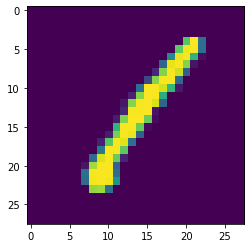

In [9]:
plt.imshow(image)

In [10]:
label = data.iloc[0, 0]
label

1

In [11]:
len(data)

42000

Изучив данные, приступим к модификации класса Dataset. Нам предстоит видеоизменить 2 функции - длину объекта (len) и итератор (getitem).

In [ ]:
class DatasetMNIST(Dataset):
    
    def __init__(self, file_path, transform=None):
        self.data = # ваш код
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # взять изображение типа ndarray type (Height * Width * Channels)
        # сконвертировать тип в np.uint8 [Unsigned integer (0 to 255)]
        # преобразовать numpy ndarray в tensor in PyTorch при следующем размере (H, W, C) --> (C, H, W)

        # ваш код
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
train_dataset = DatasetMNIST(path, transform=None)

In [ ]:
train_dataset

## transform is None

In [ ]:
# возьмем данные по итератору объекта (__getitem__(index))
img, lab = train_dataset.__getitem__(0)

In [ ]:
print(img.shape)
print(type(img))

(1, 28, 28)
<class 'numpy.ndarray'>


## take a look at the dataset

теперь мы можем объявить класс DataLoader - итератор нашего класса Dataset


In [ ]:
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

Мы можем использовать загрузчик данных в качестве итератора, используя функцию iter() и next().

In [ ]:
train_iter = iter(train_loader)
print(type(train_iter))

<class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>


In [ ]:
images, labels = next(train_iter)

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

images shape on batch size = torch.Size([8, 1, 28, 28])
labels shape on batch size = torch.Size([8])


In [ ]:
# сделаем сетку из изображений
# tensor : (batchsize, channels, height, width)
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

## transform it ToTensor()

Добавим нативные преобразования для изображений-тензоров в pytorch  

In [ ]:
class DatasetMNIST2(Dataset):
    
    def __init__(self, file_path, transform=None):
        self.data = # ваш код
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        # загрузить изображение как тип ndarray (Высота * Ширина * Каналы)
        # будьте осторожны при преобразовании dtype в np.uint8 [Целое число без знака (от 0 до 255)]
        # в этом примере мы используем ToTensor(), поэтому определяем массив numpy следующим образом (H, W, C)
        
        # ваш код
        
        if self.transform is not None:
            image = self.transform(image)
            
        return image, label

In [ ]:
train_dataset2 = DatasetMNIST2(path, transform=torchvision.transforms.ToTensor())

In [ ]:
img, lab = train_dataset2.__getitem__(0)

print('image shape at the first row : {}'.format(img.size()))

image shape at the first row : torch.Size([1, 28, 28])


In [ ]:
train_loader2 = DataLoader(train_dataset2, batch_size=8, shuffle=True)

train_iter2 = iter(train_loader2)
print(type(train_iter2))

images, labels = next(train_iter2)

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

In [ ]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

## transform it [ToTensor(), some [augmentations](https://pytorch.org/docs/stable/torchvision/transforms.html)]

Преобразования -  методы используют некоторый тип входных данных, таких как (только тензор), (тензор или numpy), (только изображение PIL), поэтому вы должны учитывать порядок преобразования

**ToTensor()**

```python
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.
    Converts a PIL Image or numpy.ndarray (H x W x C) in the range
    [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
    (this is only for np.uint8 type)
    """
```

To Tensor() принимает **PIL-изображение** или **numpy ndarray** (обе формы (высота, ширина, каналы))

**ToPILImage**

```python
    """Convert a tensor or an ndarray to PIL Image.
    Converts a torch.*Tensor of shape C x H x W or a numpy ndarray of shape
    H x W x C to a PIL Image while preserving the value range.
    Args:
        mode (`PIL.Image mode`_): color space and pixel depth of input data (optional).
            If ``mode`` is ``None`` (default) there are some assumptions made about the input data:
            1. If the input has 3 channels, the ``mode`` is assumed to be ``RGB``.
            2. If the input has 4 channels, the ``mode`` is assumed to be ``RGBA``.
            3. If the input has 1 channel, the ``mode`` is determined by the data type (i,e,
            ``int``, ``float``, ``short``).
    .. _PIL.Image mode: https://pillow.readthedocs.io/en/latest/handbook/concepts.html#concept-modes
    """
```

Для загрузки изображения() требуется **torch.*Tensor ( C, H, W )** или **numpy ndarray ( H, W, C )**

**RandomHorizontalFlip**

```python
    """Horizontally flip the given PIL Image randomly with a given probability.
    Args:
        p (float): probability of the image being flipped. Default value is 0.5
    """
```

RandomHorizontalFlip() использует только **PIL Image**

Если вы хотите использовать несколько преобразований, вы должны составить список, используя **torchvision.transforms.Compose**

Эта функция может преобразовать некоторое изображение по порядку в рамках метода **\__call__**.

```python
class Compose(object):
    """Composes several transforms together.
    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.
    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.ToTensor(),
        >>> ])
    """

    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, img):
        for t in self.transforms:
            img = t(img)
        return img

    def __repr__(self):
        format_string = self.__class__.__name__ + '('
        for t in self.transforms:
            format_string += '\n'
            format_string += '    {0}'.format(t)
        format_string += '\n)'
        return format_string
```

In [ ]:
transform = transforms.Compose([
  # ваш код
])

In [ ]:
train_dataset3 = DatasetMNIST2(path, transform=transform)

In [ ]:
train_loader3 = DataLoader(train_dataset3, batch_size=8, shuffle=True)

train_iter3 = iter(train_loader3)
print(type(train_iter3))

images, labels = next(train_iter3)

print('images shape on batch size = {}'.format(images.size()))
print('labels shape on batch size = {}'.format(labels.size()))

In [ ]:
grid = torchvision.utils.make_grid(images)

plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')
plt.title(labels.numpy());

# PyTorch

## Слои можно [определить самостоятельно](https://auro-227.medium.com/writing-a-custom-layer-in-pytorch-14ab6ac94b77)

но зачем?

In [ ]:
class MyLinearLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        w_times_x= torch.mm(x, self.weights.t())
        return torch.add(w_times_x, self.bias)  # w times x + b

In [ ]:
linear = MyLinearLayer(256, 2)

## Модель

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fl = torch.nn.Flatten(start_dim=1)
        self.fc1 = torch.nn.Linear(784, 128)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(128, 10)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(10, 10)
        self.act3 = torch.nn.Softmax(dim=1)

    def forward(self, x):
        x = self.fl(x)
        x = self.act1(self.fc1(x))
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

model = Model()

## [Batchnorm](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html). [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

In [12]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fl = torch.nn.Flatten(start_dim=1)
        self.fc1 = torch.nn.Linear(784, 128)
        self.bn1 = torch.nn.BatchNorm1d(128)
        self.act1 = torch.nn.Sigmoid()
        self.drp = torch.nn.Dropout(p=0.2)
        self.fc2 = torch.nn.Linear(128, 10)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(10, 10)

    def forward(self, x):
        x = self.fl(x)
        x = self.fc1(x)
        x = self.bn1(x)        
        x = self.act1(x)
        x = self.drp(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

model = Model()

In [13]:
def init_weights(m):
    if type(m) == torch.nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

model.apply(init_weights)

Model(
  (fl): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): Sigmoid()
  (drp): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (act2): Sigmoid()
  (fc3): Linear(in_features=10, out_features=10, bias=True)
)

## Обучение с DataLoader

In [14]:
X = data.iloc[:, 1:]
Y = data.iloc[:, 0]

In [15]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, train_size=0.7, random_state=1)
x_val, x_test, y_val, y_test = train_test_split(x_val, y_val, train_size=0.5, random_state=42)

In [17]:
class DatasetMNIST(Dataset):
    
    def __init__(self, x: pd.DataFrame, y: pd.DataFrame, transform=None, train: bool = True):
        self.x = x
        self.y = y
        self.transform = transform
        self.train = train
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        # загрузить изображение как тип ndarray (Высота * Ширина * Каналы)
        # будьте осторожны при преобразовании dtype в np.uint8 [Целое число без знака (от 0 до 255)]
        # в этом примере мы используем ToTensor(), поэтому определяем массив numpy следующим образом (H, W, C)
        image = self.x.iloc[index, :].values.astype(np.uint8).reshape((28, 28, 1))
        label = self.y.iloc[index]
        
        if self.transform is not None:
            image = self.transform(image)
        
        return (image, label) if self.train else image

In [18]:
train_dataset = DatasetMNIST(x_train, y_train)
val_dataset = DatasetMNIST(x_val, y_val)
test_dataset = DatasetMNIST(x_test, y_train)

SyntaxError: invalid syntax (2312233274.py, line 1)

In [ ]:
img, lab = train_dataset.__getitem__(0)
print(img.shape)
print(type(img))

torch.Size([1, 28, 28])
<class 'torch.Tensor'>


In [ ]:
train_loader = # ваш код
val_loader = # ваш код
test_loader = # ваш код

In [ ]:
# определим модель

model = Model()
model.apply(init_weights);

In [ ]:
# определим алгоритм оптимизации и функцию ошибки

optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
# определим устройство для обучения

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.train()
device

device(type='cpu')

In [ ]:
epochs = 4
loss_train_ep = []
loss_train_step = []
grads = []

for epoch in tqdm(range(epochs)):
    loss_epoch = 0
    for x, y in train_loader:
        optim.zero_grad()
        x = torch.tensor(x, device=device, dtype=torch.float32)
        y = torch.tensor(y, device=device)

        outputs = model(x)
        loss = criterion(outputs, y)

        loss.backward()
        optim.step()

        loss_step = loss.detach().cpu().numpy()
        loss_epoch += loss_step
        loss_train_step = np.append(loss_train_step, loss_step)
    
    # *посчитаем градиенты
    for params in model.parameters():
        print(params.grad())
  
  # посчитаем точность на валидации
    accuracy = 0
    total = 0
    for x, y in val_loader:
        with torch.no_grad():
            x = torch.tensor(x, device=device, dtype=torch.float32)
            y = torch.tensor(y, device=device)
            outputs = model(x)
            _, predicted = torch.max(outputs.data, 1)
            total += y.size(0)
            accuracy += (predicted == y).sum().item()

    local_acc = accuracy / total / len(val_loader)
    print(f'Точность {local_acc:.2f}')

    loss_train_ep = np.append(loss_train_ep, loss_epoch)

print(loss_train_ep)

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(loss_train_ep, label='loss_train_ep')

plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(grads, label='grads')

plt.legend()
plt.show()

## Лернинг рейт

In [ ]:
lr = 0.001
lrs = []
epoches = 30
for i in range(epoches):
    lr = 0.001*(1/( 1 + np.exp(1/epoches * (i*10-epoches))))
    lrs.append(lr)

plt.plot(lrs)

In [ ]:
def cyclical_lr(stepsize, epochs, min_lr=3e-4, max_lr=3e-3):

    # Scaler: we can adapt this if we do not want the triangular CLR
    scaler = lambda x: 1.

    # Lambda function to calculate the LR
    lr_lambda = lambda it: min_lr + (max_lr - min_lr) * relative(it, stepsize)*2**(-it//(2*stepsize))

    # Additional function to see where on the cycle we are
    def relative(it, stepsize):
        cycle = np.floor(1 + it / (2 * stepsize))
        x = abs(it / stepsize - 2 * cycle + 1)
        return max(0, (1 - x)) * scaler(cycle)

    return lr_lambda

In [ ]:
epochs = 100000
step_size = epochs/20
clr = cyclical_lr(step_size, epochs, min_lr=1e-9, max_lr=1e-1)
lr = []
for id in range(epochs):
  # print(i)
  lr.append(clr(id))
plt.plot(lr[:])

 [Cosine annealing](https://paperswithcode.com/method/cosine-annealing#:~:text=Cosine%20Annealing%20is%20a%20type,before%20being%20increased%20rapidly%20again.)

## Использование предобученных моделей

In [ ]:
from torchvision import models

In [ ]:
model = models.resnet50(pretrained=True)

In [ ]:
model

In [ ]:
def change_layers(model):
    model.conv1 = torch.nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    model.fc = torch.nn.Linear(2048, 10, bias=True)
    return model

change_layers(model)

### Отображение архитектуры

In [ ]:
!pip install torchinfo
from torchinfo import summary

batch_size = 256
summary(model, input_size=(batch_size, 1, 28, 28))

### Дообучение

In [ ]:
model = model.to(device)
model.train()

In [ ]:
optim = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
epochs = 4
loss_train_ep = []
loss_train_step = []
grads = []

for epoch in tqdm(range(epochs)):
    loss_epoch = 0
    for x, y in train_loader:
        optim.zero_grad()
        x = torch.tensor(x, device=device, dtype=torch.float32)
        y = torch.tensor(y, device=device)
        
        with torch.enable_grad():
            outputs = model(x)
            loss = criterion(outputs, y)

            loss.backward()
            optim.step()
            
        loss_step = loss.detach().cpu().numpy()
        loss_epoch += loss_step
        loss_train_step = np.append(loss_train_step, loss_step)
        
        # посчитаем градиенты
        # ваш код
  
    # посчитаем точность на валидации
    accuracy = 0
    total = 0
    for x, y in val_loader:
        with torch.no_grad():
            x = torch.tensor(x, device=device, dtype=torch.float32)
            y = torch.tensor(y, device=device)
            outputs = model(x)
            _, predicted = torch.max(outputs.data, 1)
            total += y.size(0)
            accuracy += (predicted == y).sum().item()
    
    local_acc = accuracy / total / len(val_loader)
    print(f'Точность {local_acc:.2f}')

    loss_train_ep = np.append(loss_train_ep, loss_epoch)

print(loss_train_ep)

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(loss_train_ep, label='loss_train_ep')

plt.legend()
plt.show()

In [ ]:
fig = plt.figure(figsize=(16, 4))
plt.plot(grads, label='grads')

plt.legend()
plt.show()

# Сохранение и загрузка модели

#### Сохранение и... 

In [ ]:
torch.save(model.state_dict(), './gdrive/My Drive/Colab Notebooks/ML/семестр2/Семинар 02 - NN/model.pth')

#### ... загрузка

In [ ]:
# определим модель
loaded_model = models.resnet50(pretrained=False)
change_layers(loaded_model)

loaded_model.load_state_dict(torch.load('./gdrive/My Drive/Colab Notebooks/ML/семестр2/Семинар 02 - NN/model.pth'))

<All keys matched successfully>

In [ ]:
loaded_model.eval()

In [ ]:
accuracy = 0
total = 0
for x, y in val_loader:
  with torch.no_grad():
    x = torch.tensor(x, device=device, dtype=torch.float32)
    y = torch.tensor(y, device=device)
    outputs = model(x)
    _, predicted = torch.max(outputs.data, 1)
    total += y.size(0)
    accuracy += (predicted == y).sum().item()
print(accuracy/total/len(val_loader))

0.9265079365079365


# Ссылки

1. [Cosine Annealing](https://paperswithcode.com/method/cosine-annealing#:~:text=Cosine%20Annealing%20is%20a%20type,before%20being%20increased%20rapidly%20again.)

2. [A Visual Guide to Learning Rate Schedulers in PyTorch](https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863)

3. [BatchNorm](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html)

4. [Dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)

5. [Torch DATASETS & DATALOADERS](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html)